## Algoritmo de Kruskal-

### Gerando AGM de Grafos

### Grafo 1:
- Só será executado esse código para fins didáticos e demonstrativos, os outros seguem a mesma lógica.


Tempo de Execução da AGM:  0.027322053909301758
1000
124 - 550: 0.0
329 - 178: 0.0
667 - 705: 0.0
312 - 315: 0.0
619 - 806: 0.0
269 - 732: 0.0
329 - 751: 0.0
10 - 28: 0.0
465 - 606: 0.0
917 - 961: 0.0
298 - 557: 0.0
15 - 703: 0.0
452 - 743: 0.0
120 - 997: 0.0
212 - 386: 0.0
172 - 635: 0.01
205 - 255: 0.01
139 - 289: 0.01
636 - 771: 0.01
175 - 824: 0.01
41 - 961: 0.01
759 - 777: 0.01
35 - 363: 0.01
32 - 739: 0.01
364 - 456: 0.01
24 - 128: 0.01
12 - 934: 0.01
542 - 607: 0.01
765 - 803: 0.01
169 - 647: 0.01
636 - 714: 0.01
382 - 458: 0.01
272 - 851: 0.01
277 - 594: 0.01
251 - 696: 0.01
696 - 843: 0.01
166 - 614: 0.01
765 - 973: 0.01
370 - 917: 0.01
754 - 332: 0.01
915 - 990: 0.01
390 - 662: 0.01
238 - 460: 0.01
296 - 422: 0.01
61 - 185: 0.02
71 - 689: 0.02
468 - 637: 0.02
134 - 274: 0.02
356 - 997: 0.02
397 - 449: 0.02
580 - 906: 0.02
769 - 990: 0.02
579 - 684: 0.02
409 - 622: 0.02
13 - 657: 0.02
108 - 617: 0.02
114 - 409: 0.02
107 - 475: 0.02
256 - 480: 0.02
299 - 364: 0.02
530 - 787: 0.

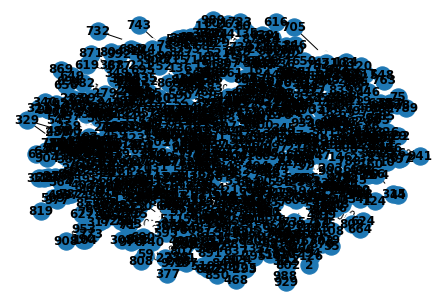

In [19]:
# ---------------------------------------------Classe principal--------------------------------------------------
# importando as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time

class Grafo:
    # Método construtor da classe
    def __init__(self, num_vertices):
        self.g_num_vertices = num_vertices
        self.grafo = []
        self.result = []

    # Função para adicionar as arestas
    def add_arestas(self, node1, node2, peso):
        self.grafo.append([node1, node2, peso])

    
    # Acha o nó raiz de uma sub-árvore que contém o nó `i`
    def encontra_sub(self, pai, i):
        if pai[i] == i:
            return i
        return self.encontra_sub(pai, pai[i])

    
    # Conecta as sub-árvores que contêm os nós `x` e `y`
    def conecta_sub(self, pai, tam_sub, x, y):
        x_raiz = self.encontra_sub(pai, x)
        y_raiz = self.encontra_sub(pai, y)
        if tam_sub[x_raiz] < tam_sub[y_raiz]:
            pai[x_raiz] = y_raiz
        elif tam_sub[x_raiz] > tam_sub[y_raiz]:
            pai[y_raiz] = x_raiz
        else:
            pai[y_raiz] = x_raiz
            tam_sub[x_raiz] += 1
    
    
    def mostra_AGM(self, result):
        G = nx.Graph() 
        # Lista aux que armazena a aresta com os seus devidos pesos
        E = []
        i = 0
        custo = 0
        for s, d, w in result:
            E.append((s, d, w))
            print("%s - %s: %s" % (s, d, w))
            i = i + 1
            custo = custo + w
        print(f"\nTotal de arestas: {i}")   
        print(f"Total do custo: {custo}") 
        # Gerando o grafo da AGM
        G.add_weighted_edges_from(E)
        pos=nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold')
        edge_weight = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
        plt.show()
        
    
    def kruskals_AGM(self):
        ini = time.time()
        # Iterador
        i = 0
        # Número das arestas do grafo
        e = 0

        # Ordenando a lista de arestas do grafo de acordo com os seus pesos
        self.grafo = sorted(self.grafo, key=lambda item: item[2])

        # Listas aux
        pai = []
        tam_sub = []

        # Inicializando as listas aux
        for vertice in range(self.g_num_vertices):
            pai.append(vertice)
            tam_sub.append(0)
        
        #criando um conjunto para armazenar os vértices para não precisar fazer uma busca
        vert = set()
        # Critério de parada da AGM: quando o número de arestas for igual ao número de vértice - 1
        while e < (self.g_num_vertices - 1):
            # Pegando uma aresta com o peso mínimo entre as duas geradas, para depois adicionar na AGM a que tiver o menor peso
            vertice_1, vertice_2, peso = self.grafo[i]
            i = i + 1

            x = self.encontra_sub(pai, vertice_1)
            y = self.encontra_sub(pai, vertice_2)
            # Se são diferentes, ou seja, as sub-árvores não estão conectadas, ele adiciona na AGM
            if x != y:
                e = e + 1
                self.result.append([vertice_1+1, vertice_2+1, peso])
                vert.add(vertice_1+1)
                vert.add(vertice_2+1)
                self.conecta_sub(pai, tam_sub, x, y)
        fim = time.time()
        t = (fim-ini)
        print("Tempo de Execução da AGM: ", t)
        print(len(vert))
        self.mostra_AGM(self.result)

# ---------------------------------------------Tratamento dos dados--------------------------------------------------
# abrindo o arquivo:
manipulador = open('grafo_W_1_1.txt', 'r')

# armazenando o número de vértice:
num_vertice = int(manipulador.readline().rstrip())

# armazenando em uma lista as linhas de dados do arquivo, que contêm as arestas com os seus pesos.
lista_aresta = []

for linha in manipulador:
    # fazendo a conversão do tipo string para inteiro
    conversao = list(map(float, linha.split()))
    # adicionando as arestas na lista
    lista_aresta.append(tuple(conversao))

graph = Grafo(num_vertice)

for i in lista_aresta:
    graph.add_arestas(int(i[0])-1, int(i[1])-1, i[2])

graph.kruskals_AGM()
